In [16]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [17]:
# Dataset: https://www.kaggle.com/datasets/mohamedbakhet/amazon-books-reviews?select=Books_rating.csv

df_all = pd.read_csv('Amazon_review/Books_rating.csv')
df = df_all[['Id', 'review/score', 'review/text']].rename(columns={'Id': 'id', 'review/score': 'score', 'review/text': 'text'}).dropna()
df['score'] = df['score'].astype('str')

df.head()

,id,score,text
0,1882931173,4.0,This is only for Julie Strain fans. It's a col...
1,0826414346,5.0,I don't care much for Dr. Seuss but after read...
2,0826414346,5.0,"If people become the books they read and if ""t..."
3,0826414346,4.0,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,4.0,Philip Nel - Dr. Seuss: American IconThis is b...


In [18]:
df.describe()

,id,score,text
count,2999992,2999992,2999992
unique,221998,5,2062648
top,B000IEZE3G,5.0,digital books are perfect and easy to use! The...
freq,6796,1807335,322


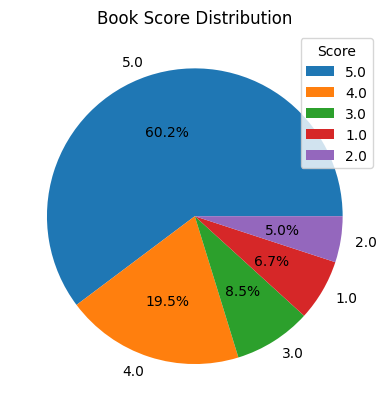

In [91]:
# Visualize score distribution in dataset
score_freq = df.score.value_counts()

plt.pie(score_freq.values, labels=score_freq.index, autopct='%1.1f%%')

# set the title and legend
plt.title('Book Score Distribution')
plt.legend(title="Score", loc="best")

# show the plot
plt.show()

As the pie chart shows, 5 is the majority of score in the dataset. 4 and 5 take about 80% of all scores, indicating that the amount of positive reviews should be greater than negative reviews.

## Text preprocessing

In [19]:
# Implementation from Dr.Yulia
# https://wustl.instructure.com/courses/100198/files/6153908/download?download_frd=1


#module for supressing warnings about future changes in Python:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#module sys helps install modules from inside Jupyter:
import sys

#html parser for digesting text taken from web-pages
!{sys.executable} -m pip install html.parser
import html.parser
from html.parser import HTMLParser

#module for handling regular expressions and special characters
import re

#Natural Language ToolKit
import nltk
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn

#modules for handling unicode characters and strings
import unicodedata
import string
!{sys.executable} -m pip install pattern3
import pattern3

import numpy as np
import pandas as pd

from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import  CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

#pretty printing
from pprint import pprint

# Plotting tools
!{sys.executable} -m pip install pyLDAvis
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
%matplotlib inline

wnl = WordNetLemmatizer()
html_parser = HTMLParser()

contraction_mapping = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}


from nltk.corpus import stopwords
nltk.download('stopwords')

stopword_list = nltk.corpus.stopwords.words('english')
stopword_list = stopword_list + ['mr', 'mrs', 'come', 'go', 'get',
                                 'tell', 'listen', 'one', 'two', 'three',
                                 'four', 'five', 'six', 'seven', 'eight',
                                 'nine', 'zero', 'join', 'find', 'make',
                                 'say', 'ask', 'tell', 'see', 'try', 'back',
                                 'also','would']


nltk.download('punkt')

def tokenize_text(text):
    tokens = nltk.word_tokenize(text) 
    tokens = [token.strip() for token in tokens]
    return tokens

def expand_contractions(text, contraction_mapping):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text
 

nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

def pos_tag_text(text_tokens):
    def penn_to_wn_tags(pos_tag):
        if pos_tag.startswith('J'):
            return wn.ADJ
        elif pos_tag.startswith('V'):
            return wn.VERB
        elif pos_tag.startswith('N'):
            return wn.NOUN
        elif pos_tag.startswith('R'):
            return wn.ADV
        else:
            return None  
    tagged_text = nltk.pos_tag(text_tokens)
    tagged_lower_text = [(word.lower(), penn_to_wn_tags(pos_tag))
                         for word, pos_tag in
                         tagged_text]
    return tagged_lower_text



def lemmatize_text(text):
    pos_tagged_text = pos_tag_text(text)
    lemmatized_tokens = [wnl.lemmatize(word, pos_tag) if pos_tag
                         else word                     
                         for word, pos_tag in pos_tagged_text]
    lemmatized_text = ' '.join(lemmatized_tokens)
    return lemmatized_text
 

    
def remove_special_characters(text):
    tokens = tokenize_text(text)
    pattern = re.compile('[{}]'.format(re.escape(string.punctuation)))
    filtered_tokens = filter(None, [pattern.sub(' ', token) for token in tokens])
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text 


def remove_stopwords(text):
    tokens = tokenize_text(text)
    filtered_tokens = [token for token in tokens if token not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text


def keep_text_characters(text):
    filtered_tokens = []
    tokens = tokenize_text(text)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text


class MLStripper(HTMLParser):
    def __init__(self):
        super().__init__()
        self.reset()
        self.fed = []
    def handle_data(self, d):
        self.fed.append(d)
    def get_data(self):
        return ' '.join(self.fed)
    
def strip_html(text):
    html_stripper = MLStripper()
    html_stripper.feed(text)
    return html_stripper.get_data()


def normalize_accented_characters(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf8')
    return text


def normalize_corpus(corpus, only_text_chars=True):
    normalized_corpus = []  
    for index, text in enumerate(corpus):
        text = normalize_accented_characters(text)
        text = html.unescape(text)
        text = strip_html(text)
        text = expand_contractions(text, contraction_mapping)
        text = tokenize_text(text)
        text = lemmatize_text(text)
        text = remove_special_characters(text)
        text = remove_stopwords(text)
        if only_text_chars:
            text = keep_text_characters(text)
        #text = tokenize_text(text)
        normalized_corpus.append(text)    
    return normalized_corpus


[notice] A new release of pip is available: 23.0.1 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Darktion\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!



[notice] A new release of pip is available: 23.0.1 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Darktion\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Darktion\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Darktion\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Darktion\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [20]:
# Normalize text data and prepare for further process

# The whole dataset is too large to fit in memory, therefore a sample is used for futher analysis.
sample_size = 500000

norm_text_sample = normalize_corpus(df['text'][:sample_size])
labels_sample = df['score'][:sample_size]

#norm_text = normalize_corpus(df['text'])
#labels_sample = df['score']

# BOW
vectorizer_BOW = CountVectorizer(max_features=2000) 
BOW_matrix = vectorizer_BOW.fit_transform(norm_text_sample)

text_sample_vectorized = pd.DataFrame(np.round(BOW_matrix.toarray(), 2), columns=vectorizer_BOW.get_feature_names_out())

# Spliting training set and test set
X_train, X_test, y_train, y_test = train_test_split(text_sample_vectorized, labels_sample, train_size=0.7, random_state=42)

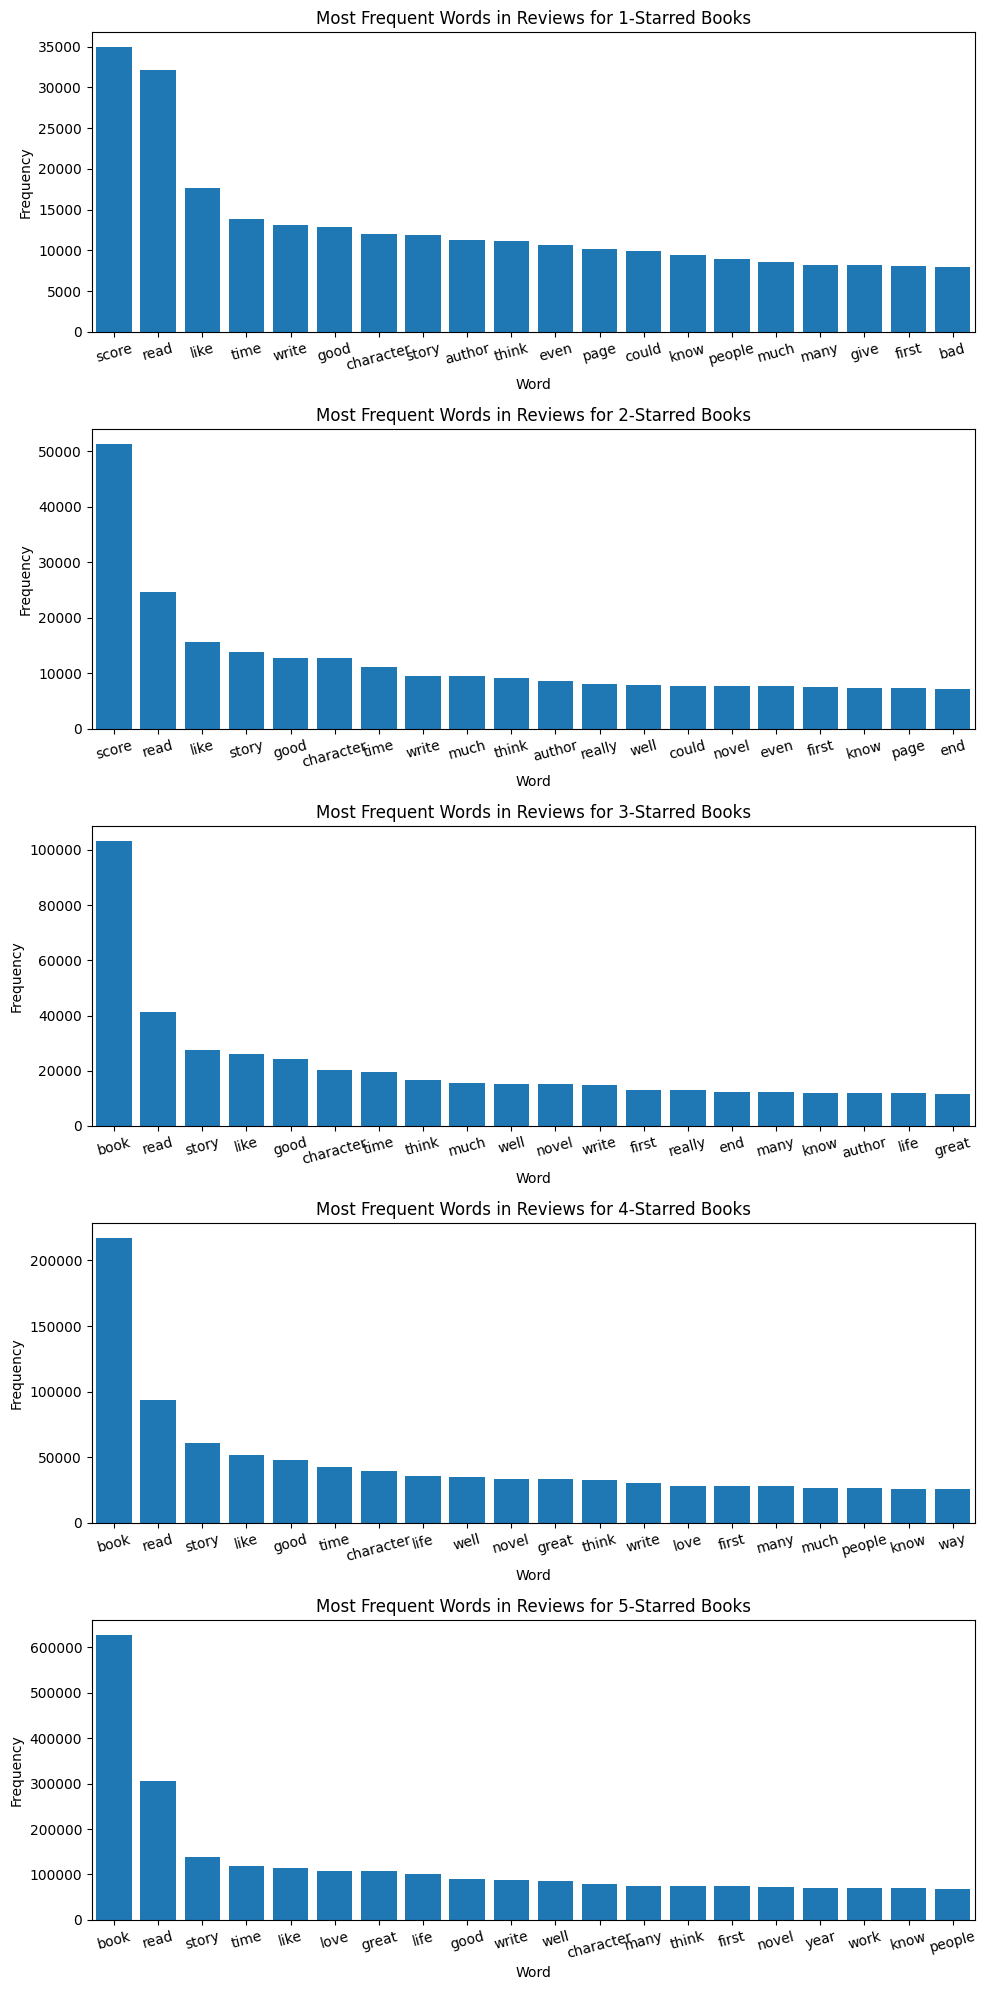

In [21]:
# create a dataframe with word frequency for each score
df_v = text_sample_vectorized.copy()
df_v['score'] = labels_sample.astype(float)

fig, axs = plt.subplots(5, 1, figsize=(10, 20))

# plot histogram for each score
for i in range(1, 6):
    df_v_i = df_v[df_v['score'] == i].sum(axis=0).sort_values(ascending=False).reset_index()[1:21].rename(columns={'index': 'word', 0: 'frequency'})
    axs[i-1].bar(df_v_i['word'], df_v_i['frequency'])
    axs[i-1].set_xlabel('Word')
    axs[i-1].set_ylabel('Frequency')
    axs[i-1].set_title(f'Most Frequent Words in Reviews for {i}-Starred Books')
    axs[i-1].tick_params(axis='x', labelrotation=15)
    axs[i-1].xaxis.set_major_locator(plt.MaxNLocator(20))
    axs[i-1].set_xlim([-0.5, 19.5])
    
plt.tight_layout()
plt.show()


# Sentiment Analysis

In [22]:
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Darktion\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [23]:
# Categorize review with score >= 4 as positive and negative otherwise
df['polarity'] = df['score'].astype(float).apply(lambda x: 'positive' if x >= 4 else 'negative')
polarity_sample = df['polarity'][:sample_size]

# Splitting training set and test set for Sentiment analysis
text_train, text_test, polarity_train, polarity_test = train_test_split(norm_text_sample, polarity_sample, train_size=0.8, 
                                                                        random_state=42)

In [24]:
def analyze_sentiment_vader_lexicon(review, threshold = 0.1, verbose = False):
    scores = analyzer.polarity_scores(review)  
    binary_sentiment = 'positive' if scores['compound'] >= threshold else 'negative'
    if verbose:                             
        print('VADER Polarity (Binary):', binary_sentiment)
        print('VADER Score:', round(scores['compound'], 2))
    return binary_sentiment,scores['compound']  

In [25]:
VADER_polarity_pred = [analyze_sentiment_vader_lexicon(text, threshold=0.1) for text in text_test]
VADER_polarity_pred_df = pd.DataFrame(VADER_polarity_pred, columns = ['VADER Polarity','VADER Score'])
VADER_polarity_pred_df.head()

,VADER Polarity,VADER Score
0,negative,-0.8924
1,positive,0.7650
2,negative,-0.9289
3,positive,0.9531
4,negative,-0.4005


In [26]:
# Evaluation and results from polarity prediction on test set

from sklearn import metrics
print('Accuracy Rate:', np.round(metrics.accuracy_score(polarity_test, 
                                 VADER_polarity_pred_df['VADER Polarity']), 3),"\n")

pd.crosstab(pd.Series(polarity_test), 
            pd.Series(VADER_polarity_pred_df['VADER Polarity']), 
            rownames = ['True:'], 
            colnames = ['Predicted:'], 
            margins = True)

Accuracy Rate: 0.765 



Predicted:,negative,positive,All
True:,,,
negative,619,3545,4164
positive,2408,13458,15866
All,3027,17003,20030


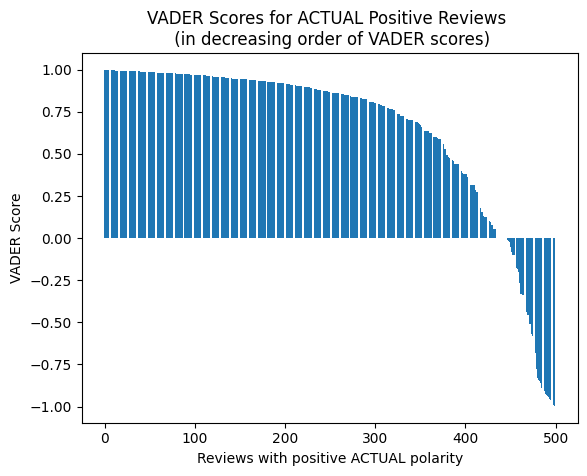

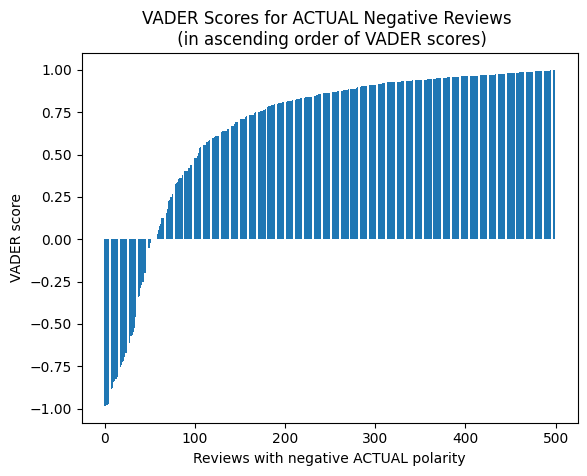

In [27]:
# Visualizations

pos_reviews_scored = VADER_polarity_pred_df[:500]['VADER Score']
plt.bar(range(0, 500), pos_reviews_scored.sort_values(ascending=False))
plt.xlabel("Reviews with positive ACTUAL polarity")
plt.ylabel("VADER Score")
plt.title("VADER Scores for ACTUAL Positive Reviews \n (in decreasing order of VADER scores)")
plt.show()

neg_reviews_scored = VADER_polarity_pred_df[500:1000]['VADER Score']
plt.bar(range(0, 500), neg_reviews_scored.sort_values(ascending=True))
plt.xlabel("Reviews with negative ACTUAL polarity")
plt.ylabel("VADER score")
plt.title("VADER Scores for ACTUAL Negative Reviews \n (in ascending order of VADER scores)")
plt.show()

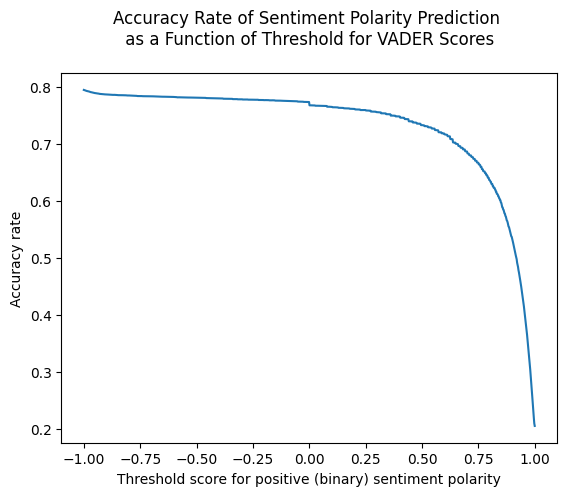

-1.0

In [28]:
# Tuning sentiment analyzer by adjusting threshold

def try_threshold_for_accuracy(sentiment_scores, threshold_for_pos):
    VADER_binary_polarity = ['positive' if s >= threshold_for_pos else 'negative' for s in list(sentiment_scores)]
    accuracy = metrics.accuracy_score(polarity_test, VADER_binary_polarity)
    return(accuracy) 

thresholds = np.linspace(-1,1,1000)
acc_rates = [try_threshold_for_accuracy(VADER_polarity_pred_df['VADER Score'], threshold) for threshold in thresholds]

plt.plot(thresholds, acc_rates)
plt.xlabel("Threshold score for positive (binary) sentiment polarity")
plt.ylabel("Accuracy rate")
plt.title("Accuracy Rate of Sentiment Polarity Prediction \n as a Function of Threshold for VADER Scores \n")
plt.show()

# Threshold with best accuracy
thresholds[acc_rates.index(max(acc_rates))]

# Topic modelling

In [29]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        
def get_topic_words(vectorizer, lda_model, n_words):
    keywords = np.array(vectorizer.get_feature_names_out())
    topic_words = []
    for topic_weights in lda_model.components_:
        top_word_locs = (-topic_weights).argsort()[:n_words]
        topic_words.append(keywords.take(top_word_locs).tolist())
    return topic_words

In [30]:
n_components = 4

lda_text = LatentDirichletAllocation(n_components=n_components, max_iter=100, doc_topic_prior=0.25,
                                           topic_word_prior = 0.25).fit(BOW_matrix)

In [31]:
no_top_words = 15
display_topics(lda_text, vectorizer_BOW.get_feature_names_out(), no_top_words)

Topic 0:
book read use good great well like give work time buy many need information look
Topic 1:
book read story like character good time think great really write novel first love well
Topic 2:
love life story book woman child family old young like man novel year time character
Topic 3:
world life work people war history many human reader american time god write us author


In [32]:
word_weights = lda_text.components_ / lda_text.components_.sum(axis=1)[:, np.newaxis]
word_weights_df = pd.DataFrame(word_weights.T, 
                               index = vectorizer_BOW.get_feature_names_out(), 
                               columns = ["Topic_" + str(i) for i in range(4)])
word_weights_df.head(10)

,Topic_0,Topic_1,Topic_2,Topic_3
19th,4.867451e-08,3.300280e-08,7.813849e-05,0.000565
20th,4.924426e-08,3.302228e-08,4.729168e-08,0.000684
abandon,5.006600e-08,1.252721e-05,2.407064e-04,0.000188
ability,1.945060e-04,2.704686e-04,2.770548e-04,0.000987
able,1.316330e-03,9.209966e-04,1.203220e-03,0.000738
absolute,1.552963e-04,1.651897e-04,3.432748e-05,0.000262
absolutely,4.846183e-04,9.826471e-04,2.061065e-04,0.000074
abuse,5.075693e-08,3.261022e-08,5.365602e-04,0.000175
academic,2.083744e-04,3.237572e-08,4.694765e-08,0.000423
accept,5.039528e-08,3.337633e-08,5.225949e-04,0.000795


In [33]:
# Topic visualization
import pyLDAvis.lda_model

pyLDAvis.enable_notebook()
pyLDAvis.lda_model.prepare(lda_text, BOW_matrix, vectorizer_BOW, mds='tsne')

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
1     -25.708494  -7.703080       1        1  30.669989
3      27.782211  17.107742       2        1  27.247965
2      52.311848 -36.405087       3        1  21.536516
0      -1.198655 -61.185368       4        1  20.545530, topic_info=           Term          Freq         Total Category  logprob  loglift
198        book  1.098480e+06  1.098480e+06  Default  30.0000  30.0000
1440       read  4.941500e+05  4.941500e+05  Default  29.0000  29.0000
1698      story  2.512690e+05  2.512690e+05  Default  28.0000  28.0000
1060       love  1.565490e+05  1.565490e+05  Default  27.0000  27.0000
262   character  1.637500e+05  1.637500e+05  Default  26.0000  26.0000
...         ...           ...           ...      ...      ...      ...
1988      write  2.966519e+04  1.547912e+05   Topic4  -5.1823  -0.0696
1160       much  2.671600e+04  1.222930e+05   Topic4  -5.2870   0.0614
1187        new  2.407311e+04  8.197575e+04   Topic4  -5.3912   0.3572
1449     really  2.383545e+04  1.096213e+05   Topic4  -5.4011   0.0567
699       first  2.407601e+04  1.307638e+05   Topic4  -5.3911  -0.1096

[315 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
16        2  0.965169    account
16        4  0.034821    account
37        1  0.766145  adventure
37        3  0.233803  adventure
38        1  0.006251     advice
...     ...       ...        ...
1994      3  0.355680       year
1994      4  0.213714       year
1998      1  0.094284      young
1998      2  0.026287      young
1998      3  0.879438      young

[507 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 3, 1])

In [34]:
# Find dominant topic

lda_text_topic_weights = lda_text.transform(BOW_matrix)

In [35]:
# Display weights of topics in documents
doc_names = ["Doc_" + str(i) for i in range(len(norm_text_sample))]
topic_names = ["Topic_" + str(i) for i in range(4)]

df_document_topic = pd.DataFrame(np.round(lda_text_topic_weights, 4), columns=topic_names, index=doc_names)
df_document_topic.head(5)

,Topic_0,Topic_1,Topic_2,Topic_3
Doc_0,0.7199,0.2636,0.0082,0.0084
Doc_1,0.3747,0.0987,0.1649,0.3616
Doc_2,0.3726,0.0556,0.1633,0.4085
Doc_3,0.2765,0.1180,0.1344,0.4711
Doc_4,0.3195,0.2469,0.0331,0.4005


In [36]:
#vector of indecies for columns with the highest value by each row in df_document_topic
dominant_topic = np.argmax(df_document_topic.values, axis=1)

#add dominant_topic as a column to df_document_topic
df_document_topic['dominant_topic'] = dominant_topic
df_document_topic.head(5)

,Topic_0,Topic_1,Topic_2,Topic_3,dominant_topic
Doc_0,0.7199,0.2636,0.0082,0.0084,0
Doc_1,0.3747,0.0987,0.1649,0.3616,0
Doc_2,0.3726,0.0556,0.1633,0.4085,3
Doc_3,0.2765,0.1180,0.1344,0.4711,3
Doc_4,0.3195,0.2469,0.0331,0.4005,3


### Topic Model Evluation

In [37]:
import gensim

from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary

In [38]:
#tokenizing the corpus
text_corpus_tokenized = [tokenize_text(norm_text_sample[doc_id]) for doc_id in range(len(norm_text_sample))]

#Dictionary of the corpus:
text_dictionary = Dictionary(text_corpus_tokenized)

#Bag-of-words representation for each document of the corpus:
text_corpus_bow = [text_dictionary.doc2bow(doc) for doc in text_corpus_tokenized]

#top 20 words for each topic (using the function defined in session prep)
topic_topwords = get_topic_words(vectorizer = vectorizer_BOW, lda_model = lda_text, n_words=20)

In [39]:
#Log-Likelihood
print("Log-Likelihood (higher values are better): ", lda_text.score(BOW_matrix))

#Perplexity score:
print("Perplexity (lower values are better): ", lda_text.perplexity(BOW_matrix))

cm = CoherenceModel(topics=topic_topwords, 
                    corpus = text_corpus_bow , 
                    dictionary = text_dictionary, coherence='u_mass')
print("Coherence score for the model: ", np.round(cm.get_coherence(), 4))  # get coherence value
print("Coherence score by topic (higher values are better): ", np.round(cm.get_coherence_per_topic(),4))


Log-Likelihood (higher values are better):  -172985287.08244258
Perplexity (lower values are better):  834.8635696427415
Coherence score for the model:  -1.5397
Coherence score by topic (higher values are better):  [-1.6244 -1.469  -1.597  -1.4683]


In [40]:
# Compare with results from LDA with 3 topics

lda_text_3_topics = LatentDirichletAllocation(n_components=3, max_iter=100,
                                              doc_topic_prior = 0.25,
                                              topic_word_prior = 0.25).fit(BOW_matrix)

#Log-Likelihood
print("Log-Likelihood (higher values are better): ", lda_text_3_topics.score(BOW_matrix))

#Perplexity score:
print("Perplexity (lower values are better): ", lda_text_3_topics.perplexity(BOW_matrix))

#coherence score for 3 topics:
topic_topwords_3_topics = get_topic_words(vectorizer = vectorizer_BOW, lda_model = lda_text_3_topics, n_words=20)
cm_3_topics = CoherenceModel(topics=topic_topwords_3_topics, 
                             corpus = text_corpus_bow, 
                             dictionary = text_dictionary, coherence='u_mass')
#overall coherence score for the model:
print("Coherence score for the model: (higher values are better)", np.round(cm_3_topics.get_coherence(), 3))  

Log-Likelihood (higher values are better):  -173328596.95038348
Perplexity (lower values are better):  846.084626241941
Coherence score for the model: (higher values are better) -1.501


# Train Models

In [41]:
# Evaluating classification model perforamnce
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score

def display_score(model, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test):
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    print("Train Accuracy : ", accuracy_score(y_train, train_pred))
    print("Test Accuracy : ", accuracy_score(y_test, test_pred))

    print("Train Classification Report : \n", classification_report(y_train, train_pred))
    print("Test Classification Report : \n", classification_report(y_test, test_pred))

    print("Train F1-Score : ", f1_score(y_train, train_pred, average='weighted'))
    print("Test F1-Score : ", f1_score(y_test, test_pred, average='weighted'))

    print("Train Precision : ", precision_score(y_train, train_pred, average='weighted'))
    print("Test Precision : ", precision_score(y_test, test_pred, average='weighted'))

    print("Train Recall : ", recall_score(y_train, train_pred, average='weighted'))
    print("Test Recall : ", recall_score(y_test, test_pred, average='weighted'))   

## Logistic Regression 

In [42]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

display_score(lr)

C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train Accuracy :  0.6583514285714286
Test Accuracy :  0.6526266666666667
Train Classification Report : 
               precision    recall  f1-score   support

         1.0       0.57      0.45      0.50     24516
         2.0       0.41      0.16      0.23     18095
         3.0       0.41      0.19      0.26     29633
         4.0       0.47      0.17      0.25     67654
         5.0       0.70      0.95      0.80    210102

    accuracy                           0.66    350000
   macro avg       0.51      0.38      0.41    350000
weighted avg       0.61      0.66      0.60    350000

Test Classification Report : 
               precision    recall  f1-score   support

         1.0       0.55      0.43      0.49     10490
         2.0       0.35      0.13      0.19      7592
         3.0       0.38      0.17      0.23     12504
         4.0       0.45      0.16      0.24     29187
         5.0       0.70      0.95      0.80     90227

    accuracy                           0.65    15

## Naive Bayes

In [43]:
from sklearn.naive_bayes import MultinomialNB

# instantiate a Multinomial Naive Bayes classifier
nb_clf = MultinomialNB()

# fit the model on the training data
nb_clf.fit(X_train, y_train)
display_score(nb_clf)

Train Accuracy :  0.6127914285714285
Test Accuracy :  0.6104333333333334
Train Classification Report : 
               precision    recall  f1-score   support

         1.0       0.39      0.55      0.46     24516
         2.0       0.27      0.27      0.27     18095
         3.0       0.31      0.25      0.27     29633
         4.0       0.37      0.27      0.31     67654
         5.0       0.76      0.81      0.78    210102

    accuracy                           0.61    350000
   macro avg       0.42      0.43      0.42    350000
weighted avg       0.59      0.61      0.60    350000

Test Classification Report : 
               precision    recall  f1-score   support

         1.0       0.39      0.54      0.45     10490
         2.0       0.25      0.24      0.24      7592
         3.0       0.29      0.23      0.26     12504
         4.0       0.37      0.26      0.31     29187
         5.0       0.76      0.81      0.78     90227

    accuracy                           0.61    15

## Ada Boost

In [44]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier()
ab.fit(X_train, y_train)
display_score(ab)

Train Accuracy :  0.6208885714285715
Test Accuracy :  0.62352
Train Classification Report : 
               precision    recall  f1-score   support

         1.0       0.47      0.26      0.34     24516
         2.0       0.29      0.05      0.09     18095
         3.0       0.30      0.08      0.12     29633
         4.0       0.38      0.09      0.14     67654
         5.0       0.65      0.96      0.78    210102

    accuracy                           0.62    350000
   macro avg       0.42      0.29      0.29    350000
weighted avg       0.54      0.62      0.53    350000

Test Classification Report : 
               precision    recall  f1-score   support

         1.0       0.48      0.27      0.34     10490
         2.0       0.30      0.05      0.09      7592
         3.0       0.31      0.08      0.13     12504
         4.0       0.39      0.09      0.14     29187
         5.0       0.65      0.96      0.78     90227

    accuracy                           0.62    150000
   mac

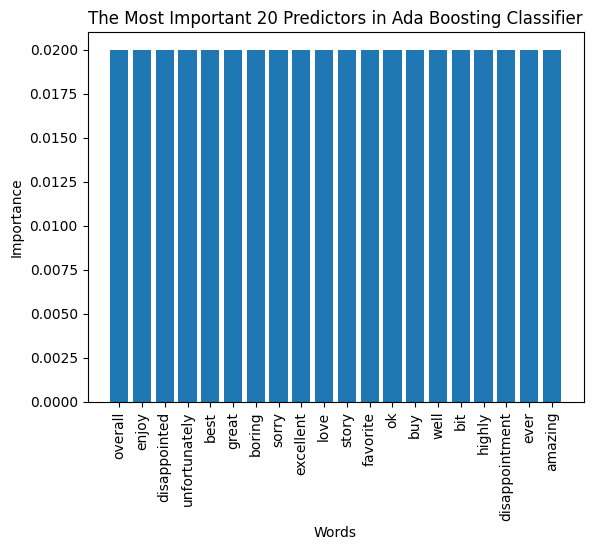

In [72]:
# Extract 20 most important words by Ada Boosting Classifier
top_20_words_ab = pd.Series(ab.feature_importances_, index=vectorizer_BOW.get_feature_names_out()).sort_values(ascending=False)[:20]


plt.bar(top_20_words_ab.index, top_20_words_ab.values)

# Add x-axis and y-axis labels
plt.xlabel('Words')
plt.ylabel('Importance')

# Rotate the x-axis labels to be readable
plt.xticks(rotation=90)
plt.title('The Most Important 20 Predictors in Ada Boosting Classifier')

# Show the plot
plt.show()

## Gradient Boost


In [45]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

display_score(gb)

Train Accuracy :  0.6273
Test Accuracy :  0.62602
Train Classification Report : 
               precision    recall  f1-score   support

         1.0       0.61      0.19      0.29     24516
         2.0       0.47      0.05      0.09     18095
         3.0       0.47      0.05      0.09     29633
         4.0       0.44      0.09      0.15     67654
         5.0       0.64      0.98      0.77    210102

    accuracy                           0.63    350000
   macro avg       0.53      0.27      0.28    350000
weighted avg       0.58      0.63      0.53    350000

Test Classification Report : 
               precision    recall  f1-score   support

         1.0       0.61      0.18      0.28     10490
         2.0       0.37      0.04      0.07      7592
         3.0       0.41      0.04      0.08     12504
         4.0       0.43      0.09      0.14     29187
         5.0       0.64      0.98      0.77     90227

    accuracy                           0.63    150000
   macro avg      

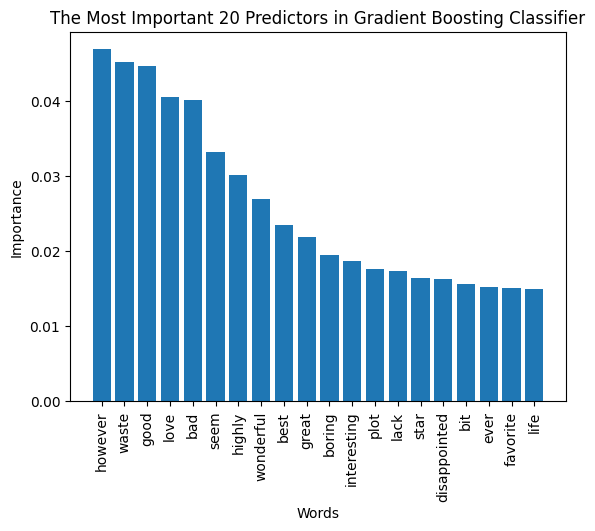

In [71]:
# Extract 20 most important words by Gradient Boosting Classifier
top_20_words_gb = pd.Series(gb.feature_importances_, index=vectorizer_BOW.get_feature_names_out()).sort_values(ascending=False)[:20]


plt.bar(top_20_words_gb.index, top_20_words_gb.values)

# Add x-axis and y-axis labels
plt.xlabel('Words')
plt.ylabel('Importance')

# Rotate the x-axis labels to be readable
plt.xticks(rotation=90)
plt.title('The Most Important 20 Predictors in Gradient Boosting Classifier')

# Show the plot
plt.show()

## Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Tuning random forest hyperparameters
# Create the parameter grid based on the results of random search 
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7]
}
# Create a based model
rf = RandomForestClassifier(random_state=42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                          cv=5, scoring='f1', return_train_score=True)

grid_search.fit(scaled_X_train, y_train)
best_rf = grid_search.best_estimator_

best_rf.fit(X_train, y_train)
display_score(best_rf)

grid_search.best_params_


C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Darktion

C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Darktion

C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Darktion

C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Darktion

C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Darktion

C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Darktion

C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Darktion

C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Darktion

C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Darktion

C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Darktion

C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Darktion

C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Darktion

C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Darktion

C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Darktion

C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Darktion

C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Darktion

C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Darktion

C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Darktion

C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Darktion

C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Darktion

C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Darktion

C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Darktion

C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Darktion

Train Accuracy :  0.6002914285714286
Test Accuracy :  0.6015133333333333


C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

Train Classification Report : 
               precision    recall  f1-score   support

         1.0       0.00      0.00      0.00     24516
         2.0       0.00      0.00      0.00     18095
         3.0       0.00      0.00      0.00     29633
         4.0       0.00      0.00      0.00     67654
         5.0       0.60      1.00      0.75    210102

    accuracy                           0.60    350000
   macro avg       0.12      0.20      0.15    350000
weighted avg       0.36      0.60      0.45    350000



C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

Test Classification Report : 
               precision    recall  f1-score   support

         1.0       0.00      0.00      0.00     10490
         2.0       0.00      0.00      0.00      7592
         3.0       0.00      0.00      0.00     12504
         4.0       0.00      0.00      0.00     29187
         5.0       0.60      1.00      0.75     90227

    accuracy                           0.60    150000
   macro avg       0.12      0.20      0.15    150000
weighted avg       0.36      0.60      0.45    150000

Train F1-Score :  0.45035522003390205
Test F1-Score :  0.4518454921941886


C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Precision :  0.36034979921632654


C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Precision :  0.3618182901777778
Train Recall :  0.6002914285714286
Test Recall :  0.6015133333333333


{'max_depth': 3, 'n_estimators': 50}

In [47]:
# Extract 20 most important words by random forest model
feature_imoprtances = best_rf.feature_importances_
top_20_words = pd.Series(feature_imoprtances, index=vectorizer_BOW.get_feature_names_out()).sort_values(ascending=False)[:20]

top_20_words

seem              0.081507
bad               0.047218
boring            0.045967
plot              0.045920
page              0.043836
bit               0.040623
instead           0.031175
lack              0.031000
great             0.026265
disappointment    0.024445
wonderful         0.022790
interesting       0.021776
poorly            0.021301
pretty            0.019162
character         0.019061
much              0.018300
really            0.017832
unfortunately     0.017383
although          0.017165
highly            0.017008
dtype: float64

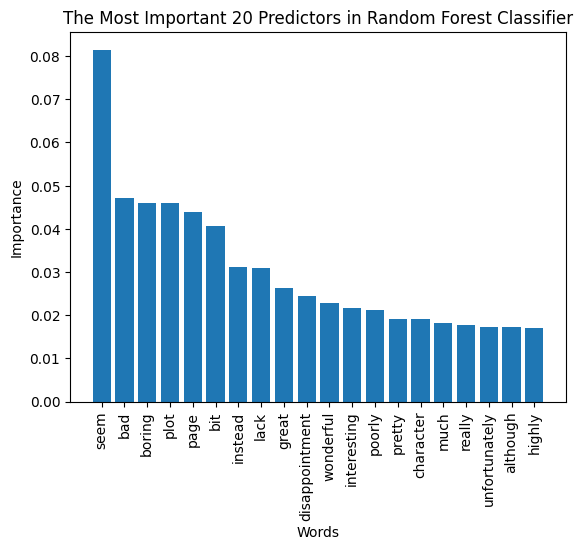

In [48]:
plt.bar(top_20_words.index, top_20_words.values)

# Add x-axis and y-axis labels
plt.xlabel('Words')
plt.ylabel('Importance')

# Rotate the x-axis labels to be readable
plt.xticks(rotation=90)
plt.title('The Most Important 20 Predictors in Random Forest Classifier')

# Show the plot
plt.show()

## SVM

In [50]:
from sklearn.preprocessing import LabelEncoder

# encode the labels into numerical format
label_encoder = LabelEncoder()
y_train_num = label_encoder.fit_transform(y_train)
y_test_num = label_encoder.transform(y_test)

from sklearn.svm import SVC
svm_clf = SVC(kernel='linear')

# fit the model on the training data
svm_clf.fit(X_train, y_train_num)

display_score(svm_clf, y_train=y_train_num, y_test=y_test_num)

MemoryError: Unable to allocate 5.22 GiB for an array with shape (350000, 2000) and data type float64

Failed to train SVM model due to RAM shortage.